# Image Convolutions using OpenCV

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read and display original image.

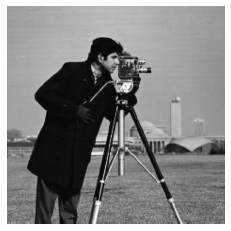

In [56]:
image = cv2.imread('camera.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(image)

## Identity Kernels


Kernels are the subset of the image matrix. They can be of MxN size where M and N are odd intergers. We will use a 3x3 kernel using NumPy.

Identity Kernel returns an exact copy or identity of the original image. It is an array with 1 as the centre element and all other elements are 0.

filter2D() function can be used to apply Kernel to an image.

The syntax of this function is
dest=cv2.filter2D(source, ddepth, kernel)

Where ddepth is the desired depth of final image. Ddepth is -1 if depth is same as original or source image.

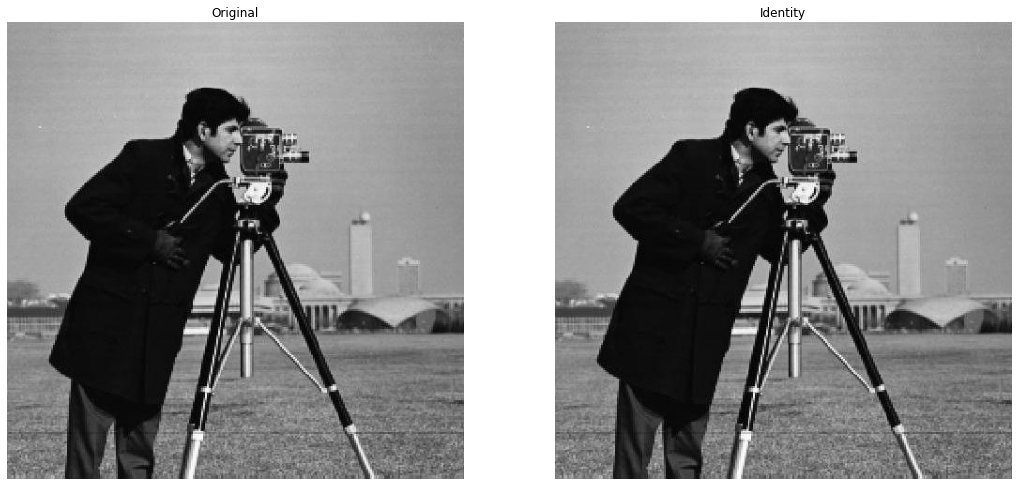

In [57]:
kernel = np.array([[0, 0, 0],
                   [0, 1, 0],
                   [0, 0, 0]])

identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original') 
plt.axis("off")

plt.subplot(122)
plt.imshow(identity)
plt.title('Identity')
plt.axis("off");

## Blur using Kernels

To blur an image, we will use a 3x3 matrix of 1s and divide it by the number of elements in the matrix. For example, 3x3 matrix has 9 elements. To increase the amount of blurring, use a larger matrix.

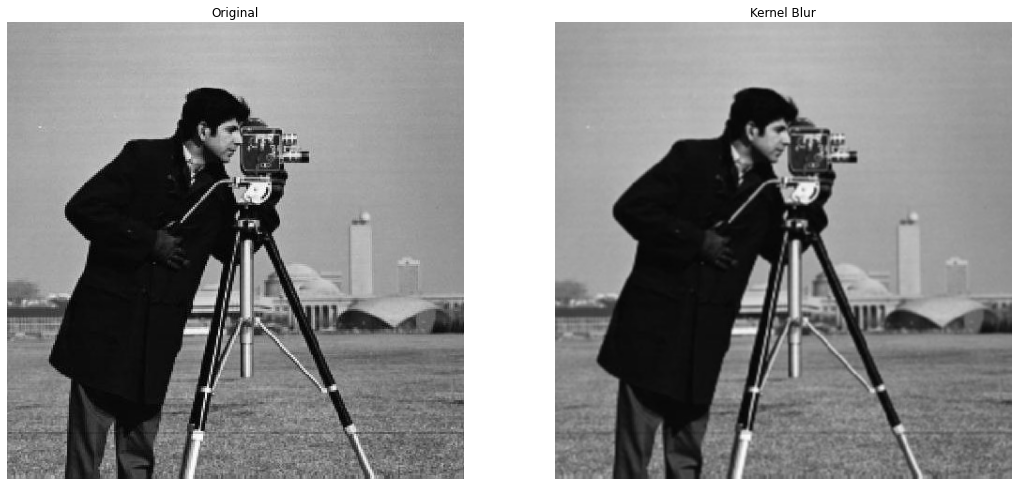

In [60]:
kernel = np.ones((3, 3), np.float32) / 9

img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)


plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(img)
plt.title('Kernel Blur')
plt.axis("off");

OpenCV has provided blur() method to blur an image.

The syntax of this function is
dest = blur(source, kernel_size)

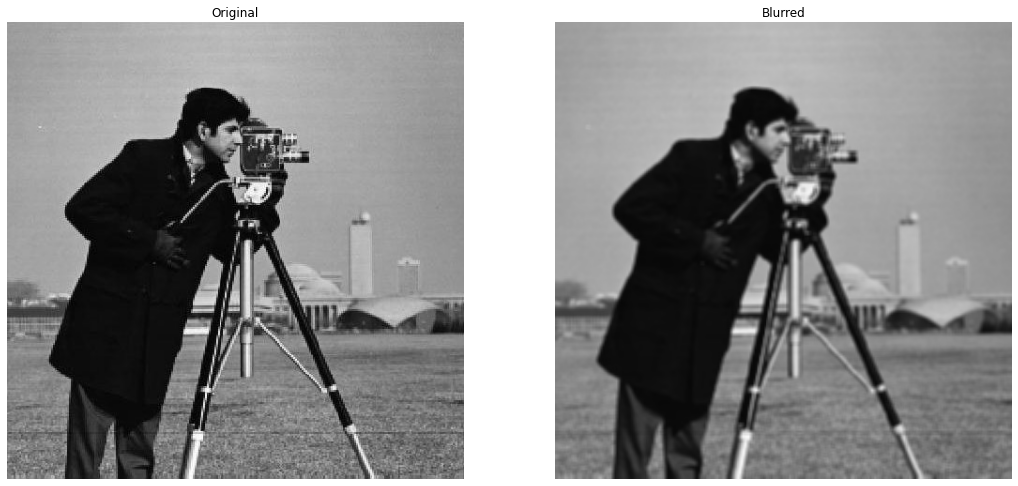

In [64]:
img_blur = cv2.blur(src=image, ksize=(5,5))

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(img_blur)
plt.title('Blurred')
plt.axis("off");

## Gaussian Blur

In this type, the image is blurred and the contrast it reduced.

The syntax of this function is
dst	=	cv2.GaussianBlur(src, kernel_size, sigmaX, sigmaY)

Where sigmaX and sigmaY are Gaussian Kernel standard deviation in X and Y axis respectively.
If both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively. If sigmaY is zero, it is set to be equal to sigmaX,

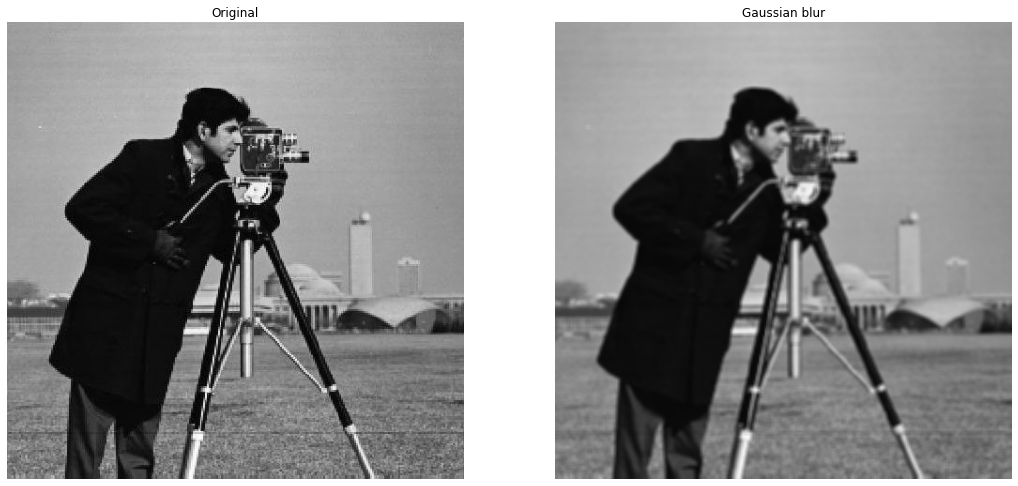

In [67]:
blur = cv2.GaussianBlur(src=image,ksize=(5,5),sigmaX=10)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(blur)
plt.title('Gaussian blur')
plt.axis("off");

## Median Blur

It is similar to blurring using Kernal, the central element of an image is replaced by median of all pixels.

The syntax of this function is
dest = cv2.medianBlur(src, kernel_size).

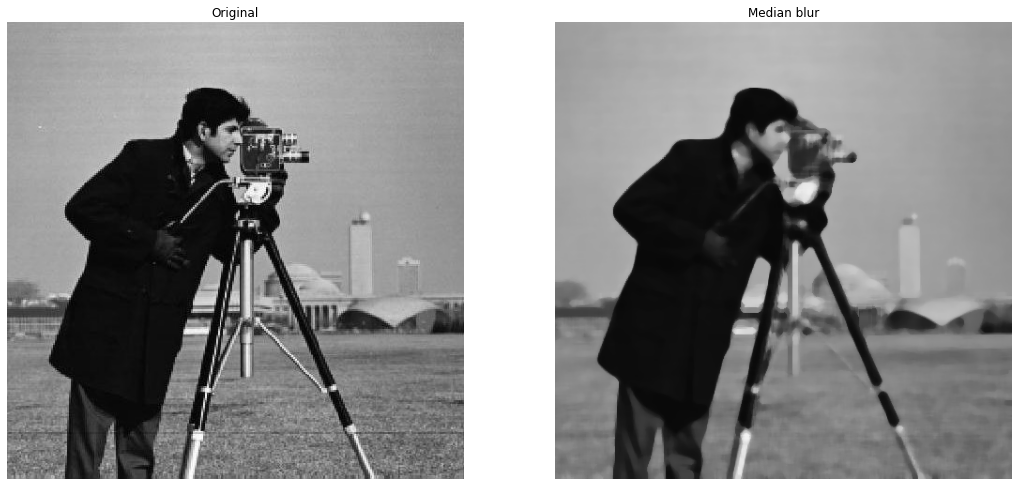

In [70]:
median = cv2.medianBlur(src=image, ksize=9)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(median)
plt.title('Median blur')
plt.axis("off");

## Sharpen using Kernel

We replace the central element of a Image by an amplified version of the same. 

It has the same syntax is Blurring using Kernel, the only change is the Kernel used.

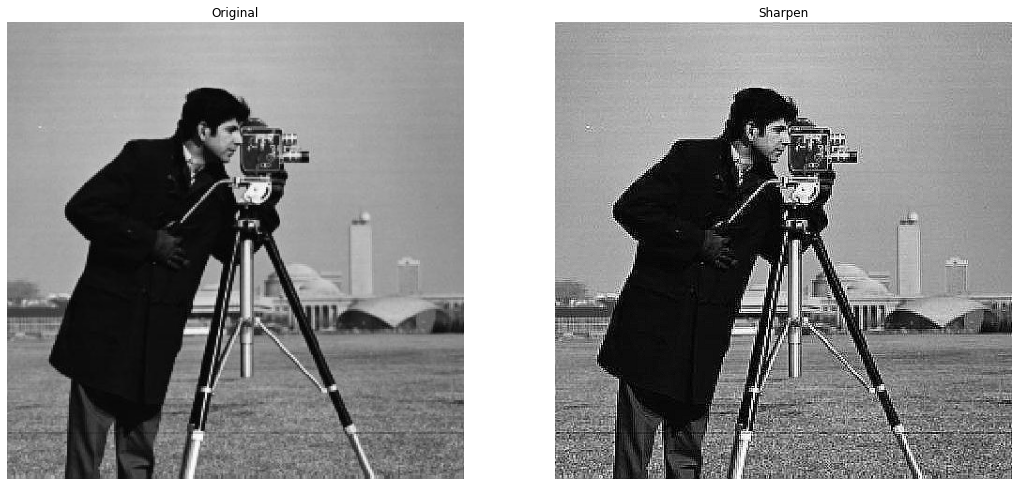

In [71]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(img)
plt.title('Sharpen')
plt.axis("off");

## Bilateral Filtering
It is highly effective in noise removal while keeping edges sharp.

The syntax of this function is
dest = cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)

Where d is Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.

sigmaColor is used to filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.

sigmaSpace is used to Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.

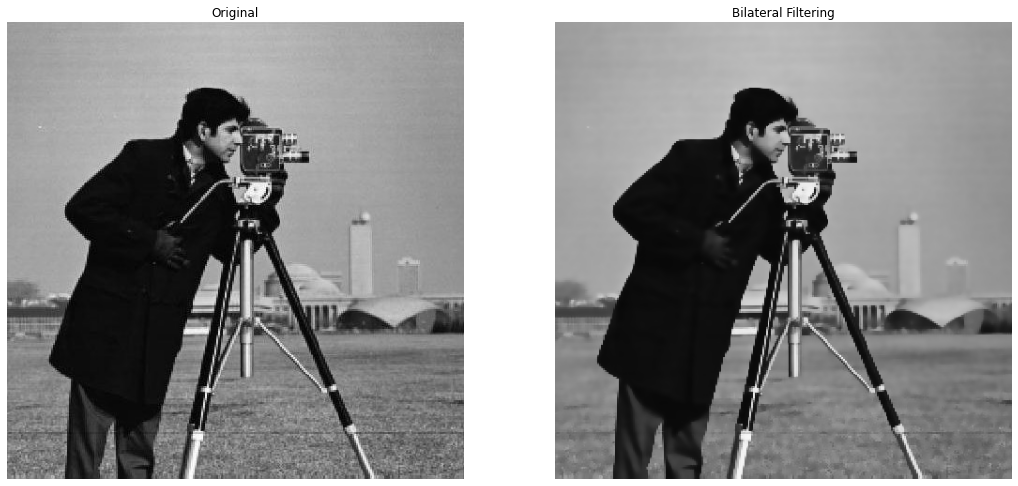

In [72]:
bf = cv2.bilateralFilter(src=image,d=9,sigmaColor=75,sigmaSpace=75)

plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(image)
plt.title('Original')
plt.axis("off")

plt.subplot(122)
plt.imshow(bf)
plt.title('Bilateral Filtering')
plt.axis("off");

Reference:
    
    1. https://learnopencv.com/image-filtering-using-convolution-in-opencv/#use-kernel-sharp-blur